In [3]:
import numpy as np
import matplotlib.pyplot as plt
from preprocessing import subsample_point_cloud, create_digital_elevation_model

In [4]:
las = subsample_point_cloud('../data/cloud_merged.las', factor=10)

# Normalize the point cloud
x = las.x - np.mean(las.x)
y = las.y - np.mean(las.y)
z = las.z - np.mean(las.z)

print(np.min(x), np.max(x))
print(np.min(y), np.max(y))
print(np.min(z), np.max(z))

-117.91070234862855 145.07409765134798
-226.25802135188133 310.04087864793837
-7.9244520045049285 8.879347995495209


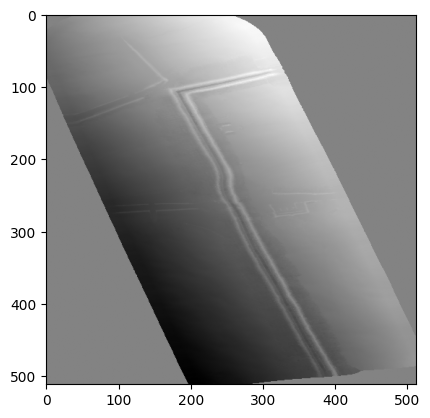

In [ ]:
dem = create_digital_elevation_model(x,y,z, threshold_down=-7, threshold_up=8)
plt.imshow(dem , cmap='gray')